In [29]:
import numpy as np 
import cv2 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

file_path = "C:/Users/aya-k/OneDrive/Bureau/VMI_M2/Projet_image"
image5_Path ="5_Vesicule.jpg"
image6_Path ="6_Vesicule.jpg"
image7_Path ="7_Vesicule.jpg"

points5_file="5_VesiculePoints.csv"
points6_file="6_VesiculePoints.csv"
points7_file="7_VesiculePoints.csv"

CenterP5_file="5_CoordinateCenter.csv"
CenterP6_file="6_CoordinateCenter.csv"
CenterP7_file="7_CoordinateCenter.csv"



Step 1 : Visualisaton

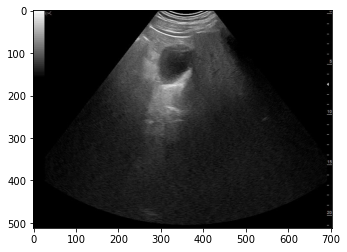

In [16]:
image5= cv2.imread(os.path.join(file_path,image5_Path))
plt.imshow(image5)


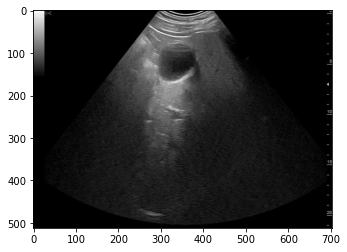

In [14]:
image6= cv2.imread(os.path.join(file_path,image6_Path))
plt.imshow(image6)


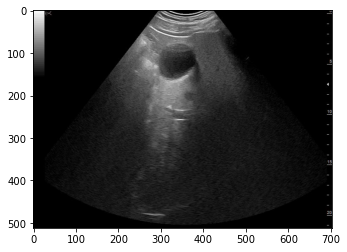

In [15]:
image7= cv2.imread(os.path.join(file_path,image7_Path))
plt.imshow(image7)

Step 2 : plot the contour points on the images

In [34]:
#Read the csv points files
points5_df = pd.read_csv(os.path.join(file_path,points5_file),sep=";")
points6_df = pd.read_csv(os.path.join(file_path,points6_file),sep=";")
points7_df = pd.read_csv(os.path.join(file_path,points7_file),sep=";")



In [33]:
#Read the centers points files 
CP5_df=pd.read_csv(os.path.join(file_path,CenterP5_file),sep=";")
CP6_df=pd.read_csv(os.path.join(file_path,CenterP6_file),sep=";")
CP7_df=pd.read_csv(os.path.join(file_path,CenterP7_file),sep=";")

In [6]:
CP5_df.head()

,X Coordinate,Y Coordinate
0,346,129


In [35]:
CP6_df.head()
CP6_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [36]:
CP7_df.head()
CP7_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [9]:
points5_df.head()


,Angle,x,y
0,0,392,129
1,2,391,130
2,4,363,130
3,6,364,130
4,8,386,134


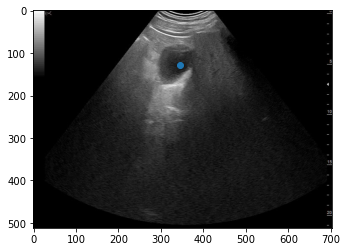

In [39]:
#plot the center point on the images 
#plot on image 5
# Get the center coordinate.
x_center=int(CP5_df.get(['X Coordinate'][0]) )
y_center =int(CP5_df.get(['Y Coordinate'][0]))

plt.scatter(x_center, y_center)
image5 = cv2.circle(image5, (int(x_center),int(y_center)), radius=0, color=(0, 0, 255), thickness=1)
plt.imshow(image5)





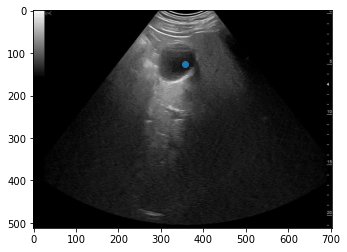

In [40]:
#plot on image 6
# Get the center coordinate.
x_center=int(CP6_df.get(['X Coordinate'][0]) )
y_center =int(CP6_df.get(['Y Coordinate'][0]))

plt.scatter(x_center, y_center)
image6 = cv2.circle(image6, (int(x_center),int(y_center)), radius=0, color=(0, 0, 255), thickness=1)
plt.imshow(image6)

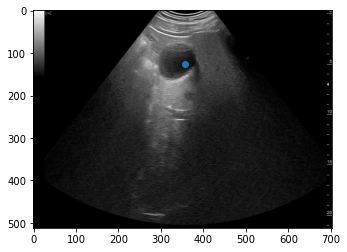

In [42]:
#plot on image 6
# Get the center coordinate.
x_center=int(CP7_df.get(['X Coordinate'][0]) )
y_center =int(CP7_df.get(['Y Coordinate'][0]))

plt.scatter(x_center, y_center)
image7 = cv2.circle(image7, (int(x_center),int(y_center)), radius=0, color=(0, 0, 255), thickness=1)
plt.imshow(image7)